MultiFruit-Classification-Using-CNN/fruits_image_classification_.ipynb
- https://github.com/sgupta117/MultiFruit-Classification-Using-CNN?tab=readme-ov-file
- 박보현


In [ ]:
#Google Drive를 마운트하여 데이터를 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install opendatasets

In [ ]:
#필요 라이브러리 로딩
import tensorflow as tf
from tensorflow.keras.optimizers import Adam  #Adam 옵티마이저
from tensorflow.keras.callbacks import EarlyStopping #EarlyStopping 콜백
from tensorflow.keras.applications import VGG16  #사전 학습된 VGG16 모델

import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import opendatasets as od  #Kaggle 데이터셋을 쉽게 다운로드
import os
import shutil  #파일 및 디렉토리 조작을 위해 사용

In [ ]:
#Kaggle에서 과일 데이터셋(Fruits-360 dataset) 다운로드
dataset_url = "https://www.kaggle.com/moltean/fruits"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhpark00
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/moltean/fruits


100%|██████████| 1.28G/1.28G [00:22<00:00, 60.4MB/s]


In [ ]:
#데이터셋 디렉토리 설정
data_dir = '/content/fruits/fruits-360_dataset/fruits-360'
os.listdir(data_dir)

['LICENSE', 'Training', 'test-multiple_fruits', 'papers', 'Test', 'readme.md']

In [ ]:
#훈련, 검증 데이터에 대해서 픽셀 값 스케일링
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)


#훈련 데이터 디렉토리 설정 및 데이터 생성기 초기화
#train_dir = "/content/drive/My Drive/Fruits Image Classification/Training_smaller"
train_dir = data_dir + '/Training'
train_gen = training_datagen.flow_from_directory(train_dir,
                                    target_size=(150, 150), #이미지 크기 조정
                                    class_mode="categorical") #다중 클래스 분류

Found 67692 images belonging to 131 classes.


In [ ]:
#검증 데이터 디렉토리 설정 및 데이터 생성기 초기화
#val_dir = "/content/drive/My Drive/Fruits Image Classification/Test_smaller"
val_dir = data_dir + '/Test'
val_gen = validation_datagen.flow_from_directory(val_dir,
                                    target_size=(150, 150),
                                    class_mode="categorical")

Found 22688 images belonging to 131 classes.


In [ ]:
#훈련 데이터 디렉토리에서 클래스 이름 읽어오기
entries = os.listdir(train_dir)
dir = sorted(entries)
d = []
for j in dir:
  d.append(j)

d

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [ ]:
#샘플 이미지를 출력하기 위해 디렉토리 설정

#apple 디렉토리
train_apple_dir = train_dir + '/Apple Red 1'

#apple 디렉토리의 이미지 개수 출력
number_apples_train = len(os.listdir(train_apple_dir))
print("total training apple images:", number_apples_train)

#banana 디렉토리
train_banana_dir = val_dir + '/Banana'

#banana 디렉토리의 이미지 개수 출력
number_banana_train = len(os.listdir(train_banana_dir))
print("total training banana images:", number_banana_train)

total training apple images: 492
total training banana images: 166


In [ ]:
#디렉토리에서 이미지 파일명 읽어오기
apple_names = os.listdir(train_apple_dir)
apple_names[:10]
banana_names = os.listdir(train_banana_dir)
banana_names[:10]

['r_239_100.jpg',
 '300_100.jpg',
 '30_100.jpg',
 'r_316_100.jpg',
 'r_28_100.jpg',
 'r_241_100.jpg',
 'r_237_100.jpg',
 '101_100.jpg',
 'r_242_100.jpg',
 '105_100.jpg']

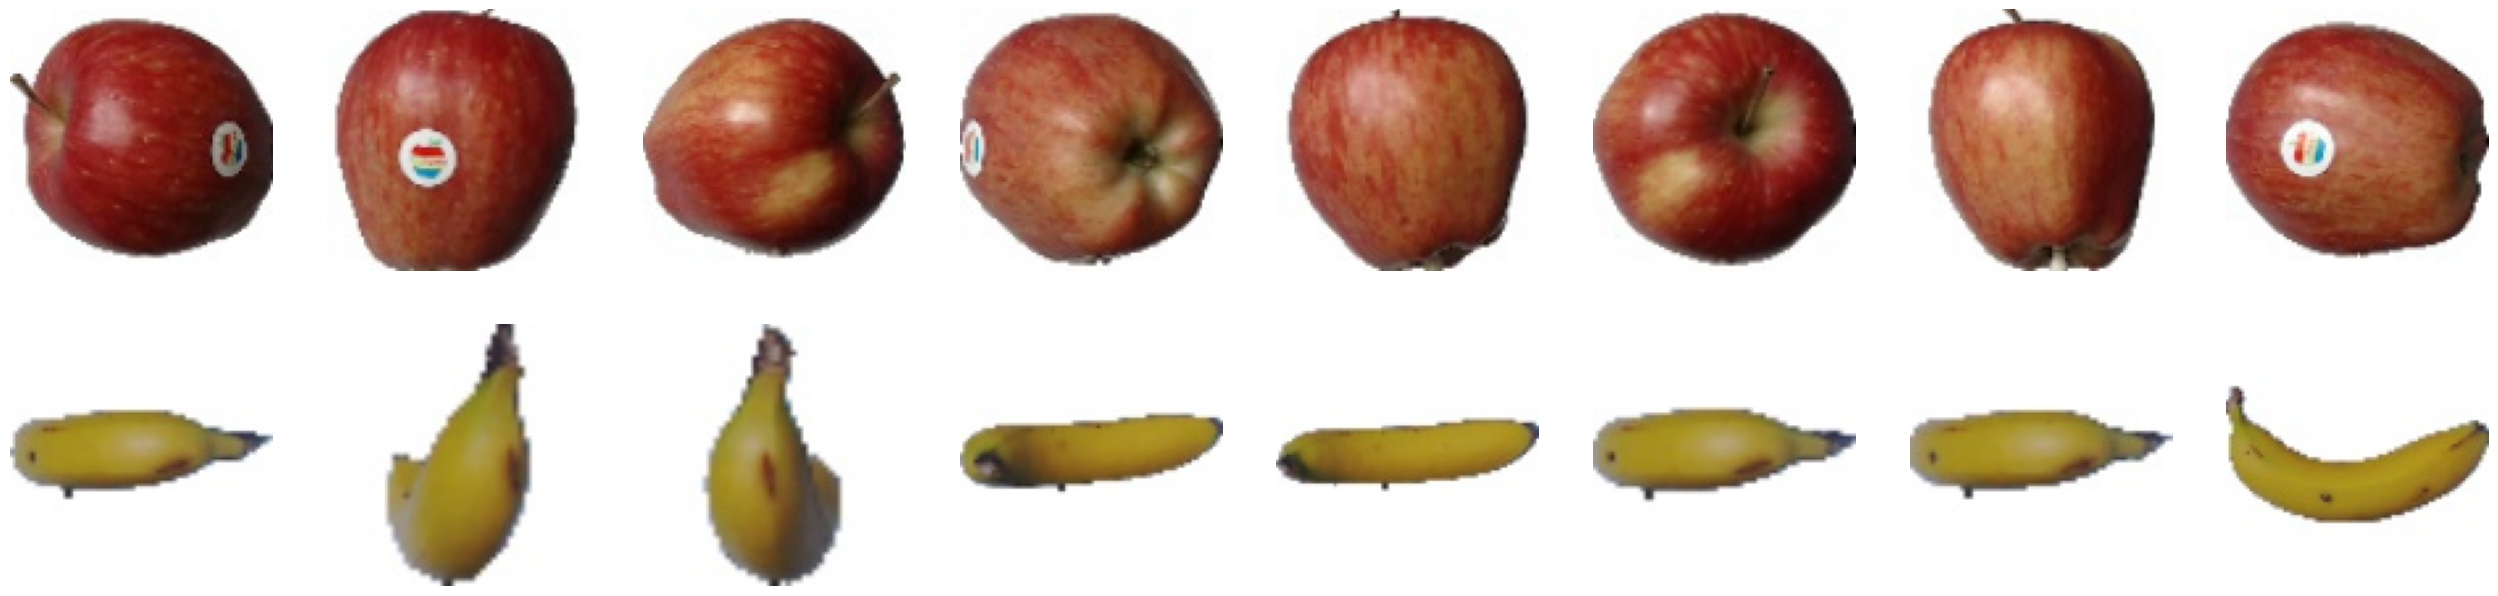

In [ ]:
#이미지 preview

#이미지를 출력할 행과 열의 개수 설정
nrows = 8
ncols = 8

#이미지 인덱스
pic_index = 0

#Matplotlib로 이미지를 출력할 크기 설정
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

#출력할 이미지 인덱스 설정
pic_index+=8

#이미지 파일 경로 설정
apple_pic = [os.path.join(train_apple_dir, fname) for fname in apple_names[pic_index-8:pic_index]]
banana_pic = [os.path.join(train_banana_dir, fname) for fname in banana_names[pic_index-8:pic_index]]

#이미지를 서브플롯으로 출력
for i, img_path in enumerate(apple_pic + banana_pic):

    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off")

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
#데이터셋의 클래스가 131개로 너무 방대하므로, 20개의 클래스만 선택하여 새로운 디렉토리 생성

#새로운 디렉토리 생성
new_data_dir = '/content/fruits_20_classes'
new_train_dir = os.path.join(new_data_dir, 'Training')
new_val_dir = os.path.join(new_data_dir, 'Test')

#새로운 디렉토리 만들기
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_val_dir, exist_ok=True)

#사용할 20개의 클래스 리스트
selected_classes = ['Apple Golden 1', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cherry 1', 'Grape Blue', 'Kiwi', 'Lemon', 'Lychee',
                    'Mango', 'Orange', 'Peach', 'Pear', 'Pineapple', 'Plum', 'Pomegranate', 'Raspberry', 'Strawberry', 'Tomato 1']

#각 클래스 폴더에서 이미지를 새로운 디렉토리로 복사
for class_name in selected_classes:
    #원본 폴더 경로
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)

    #새 폴더 경로
    new_train_class_dir = os.path.join(new_train_dir, class_name)
    new_val_class_dir = os.path.join(new_val_dir, class_name)

    os.makedirs(new_train_class_dir, exist_ok=True)
    os.makedirs(new_val_class_dir, exist_ok=True)

    #이미지 복사
    for filename in os.listdir(train_class_dir):
        src_file = os.path.join(train_class_dir, filename)
        dst_file = os.path.join(new_train_class_dir, filename)
        shutil.copy(src_file, dst_file)

    for filename in os.listdir(val_class_dir):
        src_file = os.path.join(val_class_dir, filename)
        dst_file = os.path.join(new_val_class_dir, filename)
        shutil.copy(src_file, dst_file)

#데이터 생성기 설정
training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_gen = training_datagen.flow_from_directory(new_train_dir,
                                    target_size=(150, 150),
                                    class_mode="categorical")

val_gen = validation_datagen.flow_from_directory(new_val_dir,
                                    target_size=(150, 150),
                                    class_mode="categorical")

print("Training classes:", train_gen.class_indices)
print("Validation classes:", val_gen.class_indices)

Found 10377 images belonging to 20 classes.
Found 3476 images belonging to 20 classes.
Training classes: {'Apple Golden 1': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Blueberry': 4, 'Cherry 1': 5, 'Grape Blue': 6, 'Kiwi': 7, 'Lemon': 8, 'Lychee': 9, 'Mango': 10, 'Orange': 11, 'Peach': 12, 'Pear': 13, 'Pineapple': 14, 'Plum': 15, 'Pomegranate': 16, 'Raspberry': 17, 'Strawberry': 18, 'Tomato 1': 19}
Validation classes: {'Apple Golden 1': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Blueberry': 4, 'Cherry 1': 5, 'Grape Blue': 6, 'Kiwi': 7, 'Lemon': 8, 'Lychee': 9, 'Mango': 10, 'Orange': 11, 'Peach': 12, 'Pear': 13, 'Pineapple': 14, 'Plum': 15, 'Pomegranate': 16, 'Raspberry': 17, 'Strawberry': 18, 'Tomato 1': 19}


In [ ]:
#전이 학습을 위한 VGG16 모델 불러오기 (사전 학습된 가중치 사용)
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  #VGG16의 가중치를 고정하여 학습하지 않음

#데이터셋의 클래스 수 가져오기
num_classes = len(train_gen.class_indices)

#전이 학습 모델 정의
model = tf.keras.models.Sequential([
    base_model,  #VGG16 기본 모델
    tf.keras.layers.Flatten(),  #평탄화 층
    tf.keras.layers.Dense(512, activation='relu'),  #완전 연결 층
    tf.keras.layers.Dropout(0.5),  #드롭아웃 층 (과적합 방지)
    tf.keras.layers.Dense(num_classes , activation='softmax')  #출력 층 (20개 클래스에 대한 소프트맥스)
])

#모델 컴파일 (손실 함수, 최적화 알고리즘, 평가 지표 설정)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

#Early Stopping 콜백 설정 (검증 손실이 개선되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 18919764 (72.17 MB)
Trainable params: 4205076 (16.04 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#검증 데이터에 대한 교육 정확도가 99%에 도달하면 학습을 종료하는 콜백 기능 구현

#특정 정확도에 도달하면 학습을 중단하는 콜백 클래스 정의
validation_accuracy = 0.99

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy:
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training = True

#콜백 리스트 설정
callbacks = [myCallback(), early_stopping]

In [ ]:
#모델 학습
fruit_model = model.fit(train_gen, epochs=15, validation_data=val_gen, callbacks=callbacks)

Epoch 1/15
325/325 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.9260 - precision: 0.9846 - recall: 0.8885
Reached desired validation accuracy, so cancelling training
325/325 [==============================] - 43s 106ms/step - loss: 0.2933 - accuracy: 0.9260 - precision: 0.9846 - recall: 0.8885 - val_loss: 0.0366 - val_accuracy: 0.9925 - val_precision: 0.9951 - val_recall: 0.9865


In [ ]:
#모델 학습
fruit_model = model.fit(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50
325/325 [==============================] - 34s 103ms/step - loss: 0.0072 - accuracy: 0.9994 - precision: 0.9995 - recall: 0.9993 - val_loss: 0.0156 - val_accuracy: 0.9960 - val_precision: 0.9974 - val_recall: 0.9948
Epoch 2/50
325/325 [==============================] - 29s 90ms/step - loss: 0.0048 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9995 - val_loss: 0.0149 - val_accuracy: 0.9954 - val_precision: 0.9960 - val_recall: 0.9940
Epoch 3/50
325/325 [==============================] - 29s 91ms/step - loss: 0.0028 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999 - val_loss: 0.0191 - val_accuracy: 0.9942 - val_precision: 0.9974 - val_recall: 0.9905
Epoch 4/50
325/325 [==============================] - 30s 91ms/step - loss: 0.0158 - accuracy: 0.9959 - precision: 0.9968 - recall: 0.9946 - val_loss: 0.1034 - val_accuracy: 0.9623 - val_precision: 0.9689 - val_recall: 0.9600
Epoch 5/50
325/325 [==============================] - 30s 91ms/step - loss: 0.0845 - accuracy: 

In [ ]:
#모델 저장 경로 설정 및 모델 저장
filepath = "/content/drive/MyDrive/Colab Notebooks/Kaggle/Fruits Image Classification"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

#Keras 형식으로도 모델 저장
model.save("/content/drive/MyDrive/Colab Notebooks/Kaggle/Fruits Image Classification/fruit_new_final.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#모델 학습의 정확도 출력
fruit_model.history['accuracy']

[0.9994217753410339,
 0.9999036192893982,
 0.9999036192893982,
 0.9958562254905701,
 0.9724390506744385,
 0.9969162344932556,
 0.9962416887283325,
 0.9962416887283325,
 0.9923869967460632,
 0.9947961568832397,
 0.9945070743560791,
 0.9973016977310181,
 0.9946998357772827,
 0.9953743815422058,
 0.991905152797699,
 0.9928688406944275,
 0.9960489273071289,
 0.9962416887283325,
 0.9944106936454773,
 0.9957598447799683,
 0.9981690049171448,
 0.9932543039321899,
 0.9922906160354614,
 0.9982653856277466,
 0.9973016977310181,
 0.9959526062011719,
 0.9961453080177307,
 0.9940252304077148,
 0.9943143725395203,
 0.9983617663383484,
 0.9977835416793823,
 0.9955671429634094,
 0.9946998357772827,
 0.9955671429634094,
 0.9948925375938416,
 0.9971089959144592,
 0.9983617663383484,
 0.9962416887283325,
 0.9962416887283325,
 0.9973980784416199,
 0.9981690049171448,
 0.9941216111183167,
 0.9973016977310181,
 0.996627151966095,
 0.9941216111183167,
 0.9982653856277466,
 0.9978799223899841,
 0.998650848865

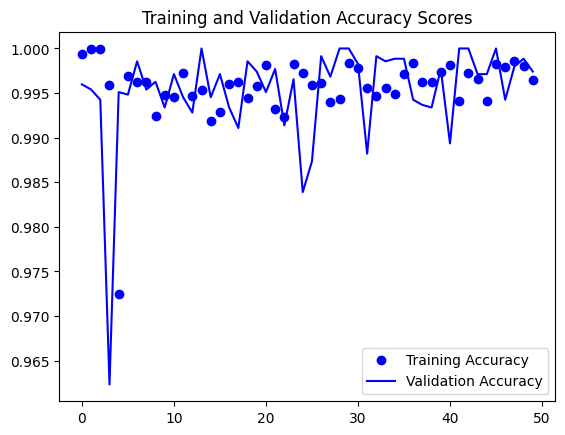

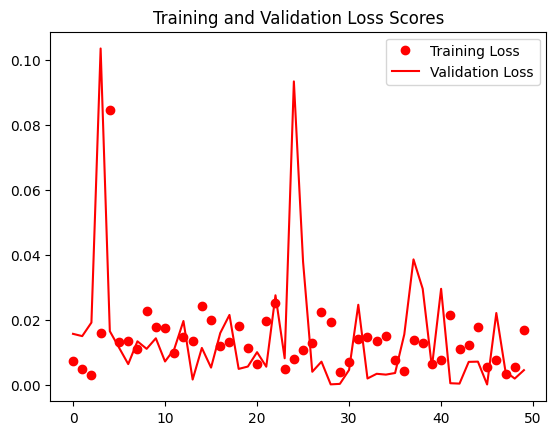

In [ ]:
#과일 모델의 손실 함수 및 정확도 점수 그래프 생성

#학습 및 검증 정확도/손실 값 시각
acc = fruit_model.history['accuracy'] #훈련된 모델의 훈련 정확도 점수(training accuracy scores)
val_acc = fruit_model.history['val_accuracy'] #훈련된 모델의 유효성 검사 정확도 점수(validation accuracy scores)
loss = fruit_model.history['loss'] #훈련된 모델의 훈련 손실 점수(training loss scores)
val_loss = fruit_model.history['val_loss'] #훈련된 모델의 유효성 검사 손실 점수(validation loss scores)

#에폭 수에 따라 x축 설정
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')  #훈련 정확도 점수를 시각화
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')  #유효성 검사 정확도 점수를 시각화
plt.title('Training and Validation Accuracy Scores')  #플롯 제목 설정
plt.legend()  #범례 설정
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training Loss')  #훈련 손실 점수를 시각화
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')  #유효성 검사 손실 점수를 시각화
plt.title('Training and Validation Loss Scores')
plt.legend()

plt.show()

Saving 바나나.jpg to 바나나.jpg
1/1 [==============================] - 1s 1s/step
3
The fruit is: Banana


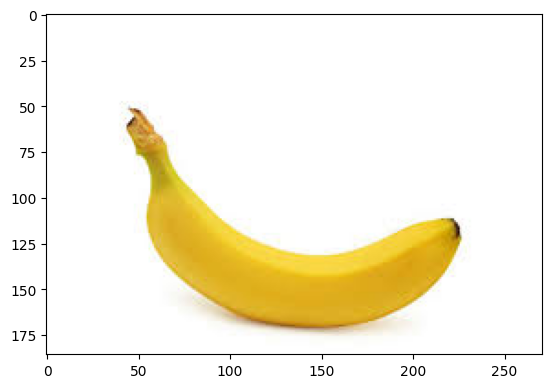

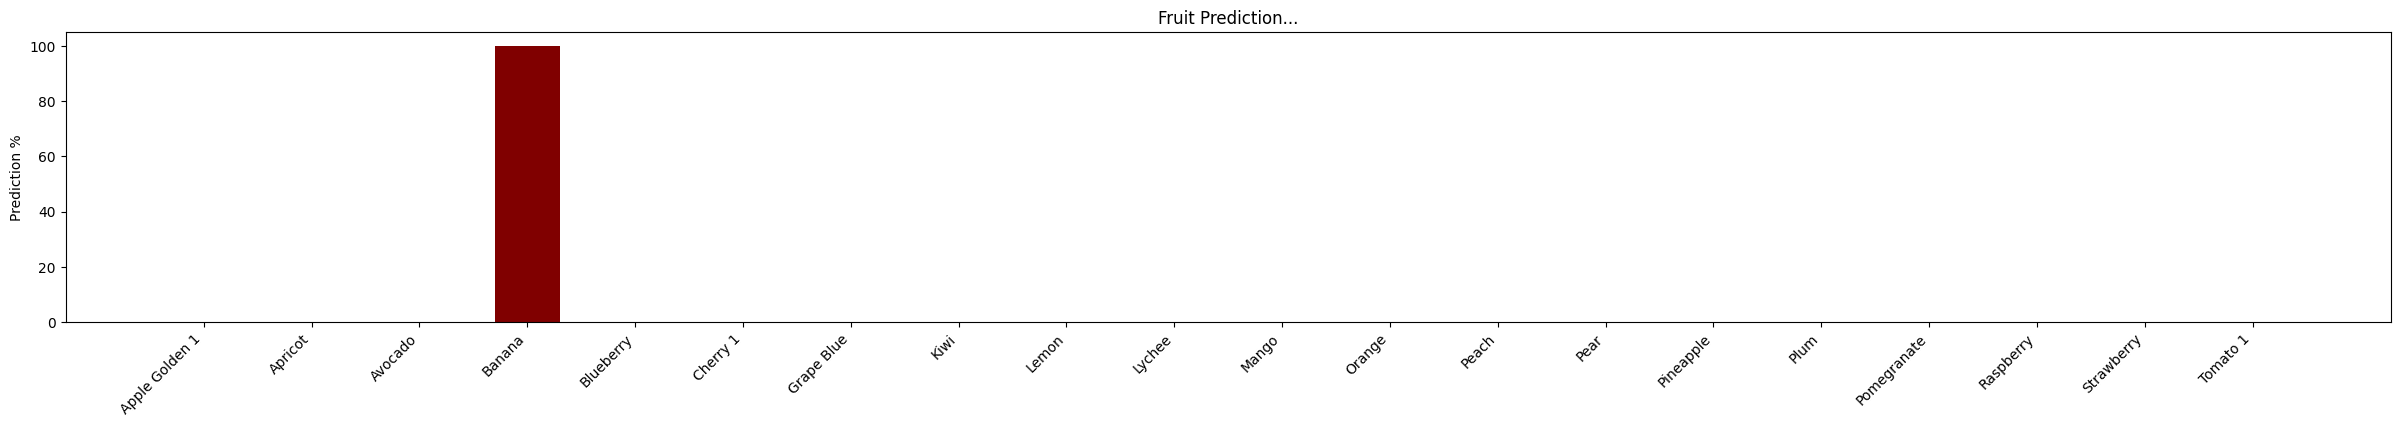

In [ ]:
#사용자가 업로드한 이미지 예측
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from google.colab import files

#파일 업로드
uploaded = files.upload()

#업로드된 파일 예측
for fn in uploaded.keys():

  #이미지 오픈
  path = '/content/' + fn
  pic = Image.open(path)
  #이미지를 지정된 크기로 로드
  img = image.load_img(path, target_size = (150, 150))
  #이미지를 배열로 변환
  array = image.img_to_array(img)
  #차원을 확장하여 모델 입력 형식에 맞춤
  x = np.expand_dims(array, axis=0)

  #예측을 위해 배열 쌓기
  vimage = np.vstack([x])
  #모델로 이미지 예측
  res = model.predict(vimage)

#클래스 인덱스와 클래스 이름 매핑
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

#가장 높은 확률을 가진 클래스 찾기
result = np.argmax(res[0])
print(result)
print("The fruit is: " + class_labels[result])

#이미지 출력
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

#예측 결과를 막대 그래프로 출력
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

#클래스 수에 따라 y축 위치 설정
y_pos = np.arange(len(class_labels))
#그래프 크기 설정
fig = plt.figure(figsize=(30, 5))
#막대 그래프 생성
plt.bar(class_labels, res[0]*100, color = 'maroon', width = 0.6)

#x축 레전드의 글씨를 45도 기울여서 출력
plt.xticks(y_pos, class_labels, rotation=45, ha='right')
plt.ylabel('Prediction %')
plt.title('Fruit Prediction...')

#하단 마진을 조정하여 레이블 간의 간격을 넓힘
plt.subplots_adjust(bottom=0.3)

plt.show()

Saving 토마토.jpg to 토마토.jpg
1/1 [==============================] - 0s 18ms/step
19
The fruit is: Tomato 1


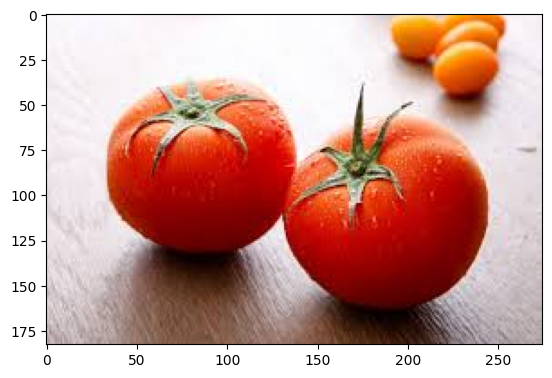

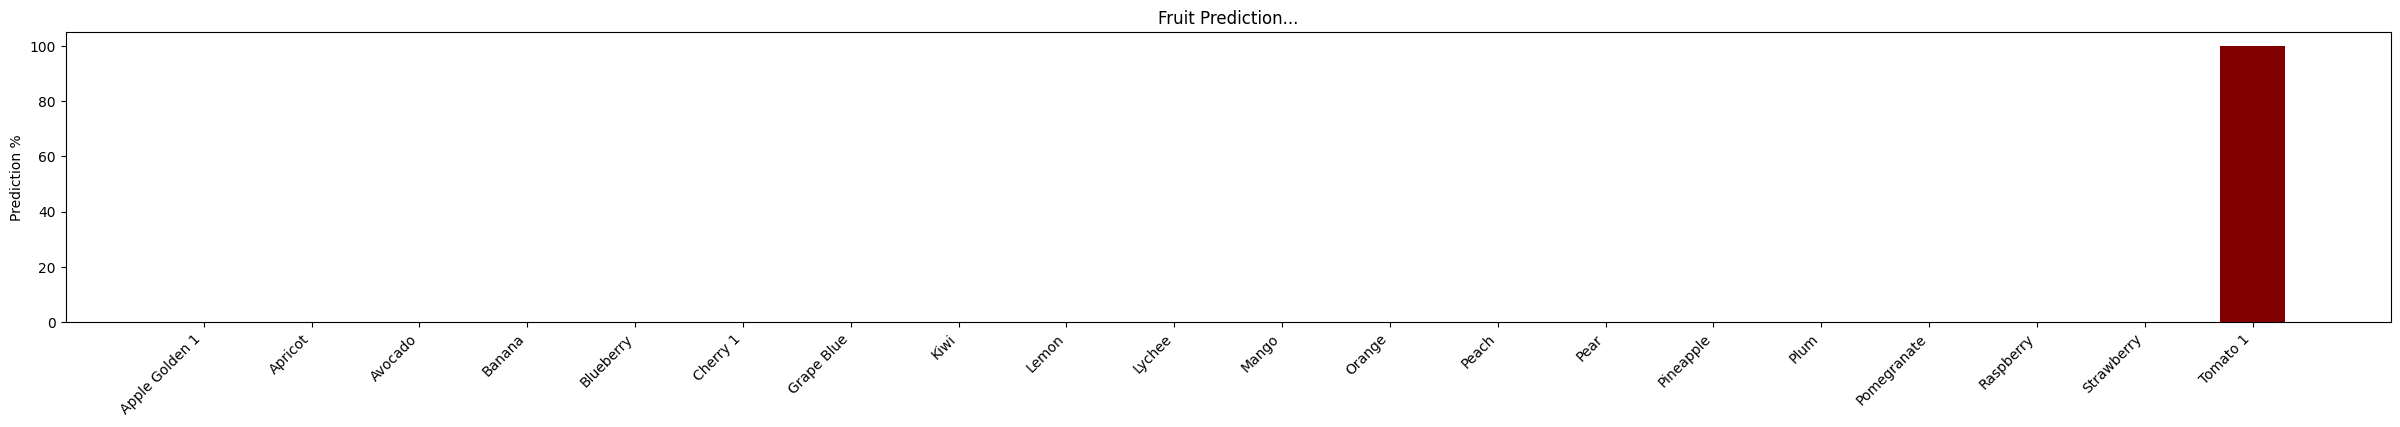

In [ ]:
#사용자가 업로드한 이미지 예측
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from google.colab import files

#파일 업로드
uploaded = files.upload()

#업로드된 파일 예측
for fn in uploaded.keys():

  #이미지 오픈
  path = '/content/' + fn
  pic = Image.open(path)
  #이미지를 지정된 크기로 로드
  img = image.load_img(path, target_size = (150, 150))
  #이미지를 배열로 변환
  array = image.img_to_array(img)
  #차원을 확장하여 모델 입력 형식에 맞춤
  x = np.expand_dims(array, axis=0)

  #예측을 위해 배열 쌓기
  vimage = np.vstack([x])
  #모델로 이미지 예측
  res = model.predict(vimage)

#클래스 인덱스와 클래스 이름 매핑
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

#가장 높은 확률을 가진 클래스 찾기
result = np.argmax(res[0])
print(result)
print("The fruit is: " + class_labels[result])

#이미지 출력
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

#예측 결과를 막대 그래프로 출력
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

#클래스 수에 따라 y축 위치 설정
y_pos = np.arange(len(class_labels))
#그래프 크기 설정
fig = plt.figure(figsize=(30, 5))
#막대 그래프 생성
plt.bar(class_labels, res[0]*100, color = 'maroon', width = 0.6)

#x축 레전드의 글씨를 45도 기울여서 출력
plt.xticks(y_pos, class_labels, rotation=45, ha='right')
plt.ylabel('Prediction %')
plt.title('Fruit Prediction...')

#하단 마진을 조정하여 레이블 간의 간격을 넓힘
plt.subplots_adjust(bottom=0.3)

plt.show()

Saving 라즈베리.jpg to 라즈베리.jpg
1/1 [==============================] - 0s 17ms/step
17
The fruit is: Raspberry


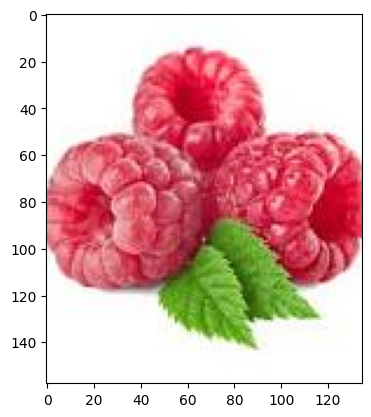

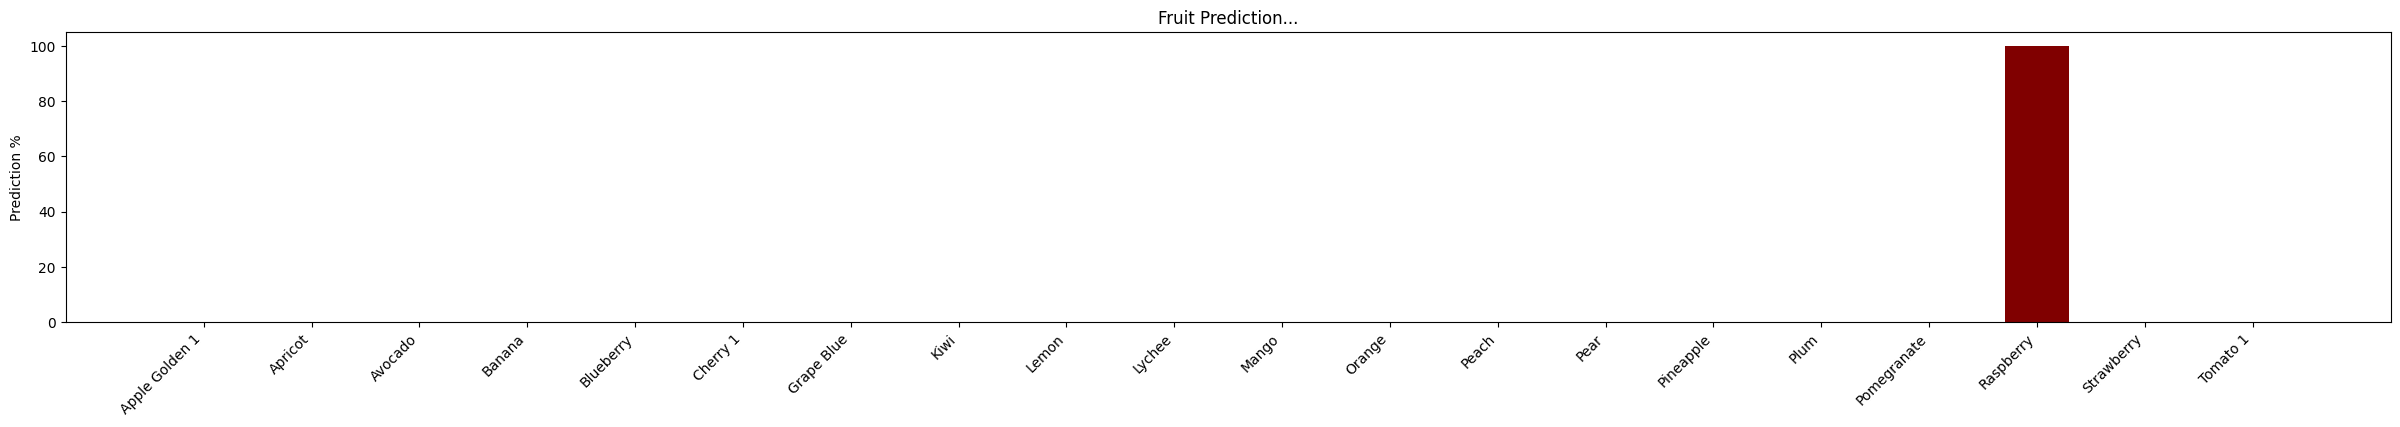

In [ ]:
#사용자가 업로드한 이미지 예측
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from google.colab import files

#파일 업로드
uploaded = files.upload()

#업로드된 파일 예측
for fn in uploaded.keys():

  #이미지 오픈
  path = '/content/' + fn
  pic = Image.open(path)
  #이미지를 지정된 크기로 로드
  img = image.load_img(path, target_size = (150, 150))
  #이미지를 배열로 변환
  array = image.img_to_array(img)
  #차원을 확장하여 모델 입력 형식에 맞춤
  x = np.expand_dims(array, axis=0)

  #예측을 위해 배열 쌓기
  vimage = np.vstack([x])
  #모델로 이미지 예측
  res = model.predict(vimage)

#클래스 인덱스와 클래스 이름 매핑
class_indices = train_gen.class_indices
class_labels = list(class_indices.keys())

#가장 높은 확률을 가진 클래스 찾기
result = np.argmax(res[0])
print(result)
print("The fruit is: " + class_labels[result])

#이미지 출력
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

#예측 결과를 막대 그래프로 출력
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

#클래스 수에 따라 y축 위치 설정
y_pos = np.arange(len(class_labels))
#그래프 크기 설정
fig = plt.figure(figsize=(30, 5))
#막대 그래프 생성
plt.bar(class_labels, res[0]*100, color = 'maroon', width = 0.6)

#x축 레전드의 글씨를 45도 기울여서 출력
plt.xticks(y_pos, class_labels, rotation=45, ha='right')
plt.ylabel('Prediction %')
plt.title('Fruit Prediction...')

#하단 마진을 조정하여 레이블 간의 간격을 넓힘
plt.subplots_adjust(bottom=0.3)

plt.show()